# Load Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
data=pd.read_csv("diabetes.csv")


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Removing outliers

In [7]:
data.loc[(data.SkinThickness<5)& (data.Outcome==0), 'SkinThickness']=int(data[(data.Outcome==0)]['SkinThickness'].mean())
data.loc[(data.SkinThickness<5)& (data.Outcome==1), 'SkinThickness']=int(data[(data.Outcome==1)]['SkinThickness'].mean())

In [8]:
data.loc[(data.Insulin==0)& (data.Outcome==0), 'Insulin']=int(data[(data.Outcome==0)]['Insulin'].mean())
data.loc[(data.Insulin==0)& (data.Outcome==1), 'Insulin']=int(data[(data.Outcome==1)]['Insulin'].mean())

In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# data visualization

Text(0.5, 1.0, 'Womans have diabetes')

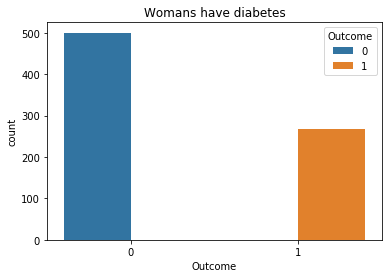

In [10]:
sns.countplot(data=data ,x="Outcome",hue="Outcome")
plt.title("Womans have diabetes")

Text(0.5, 1.0, ' Age ')

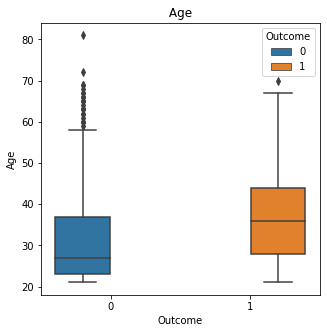

In [11]:
fig, ax=plt.subplots(figsize=(5,5))
sns.boxplot(y="Age",x='Outcome',hue='Outcome',data=data)
plt.title(" Age ")

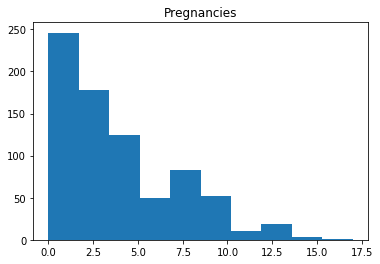

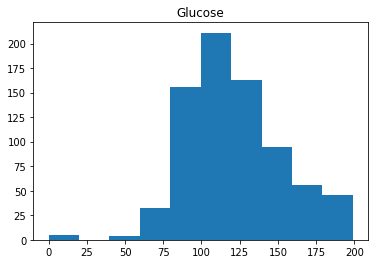

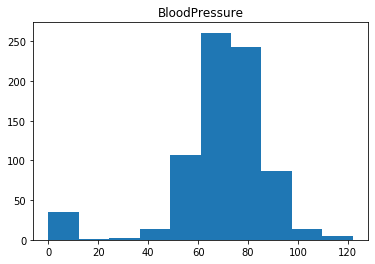

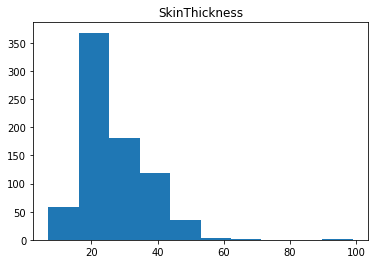

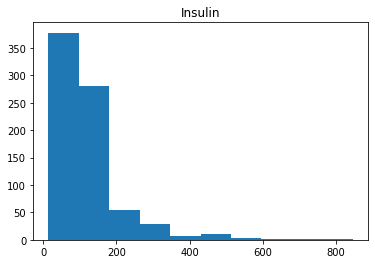

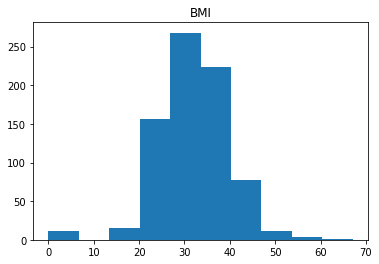

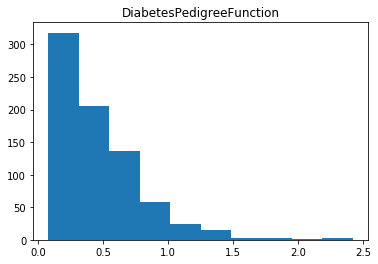

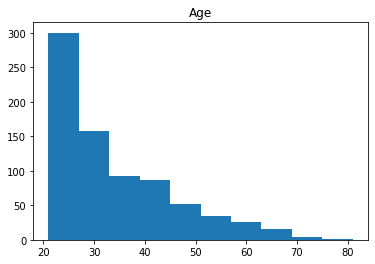

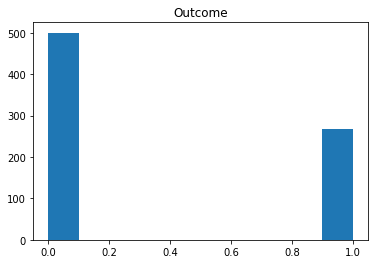

In [12]:
for i in data.columns:
    plt.figsize=(12,10)
    plt.hist(data[i])
    plt.title(i)
    plt.show()

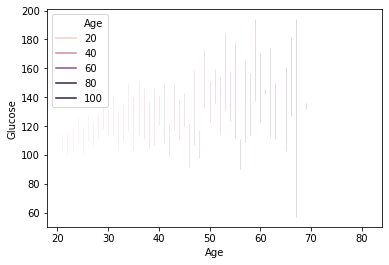

In [13]:
sns.lineplot(data=data ,x='Age',hue='Age',y="Glucose")

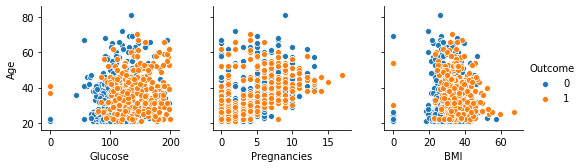

In [14]:
sns.pairplot(x_vars=["Glucose","Pregnancies","BMI"],y_vars="Age",hue="Outcome",data=data)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


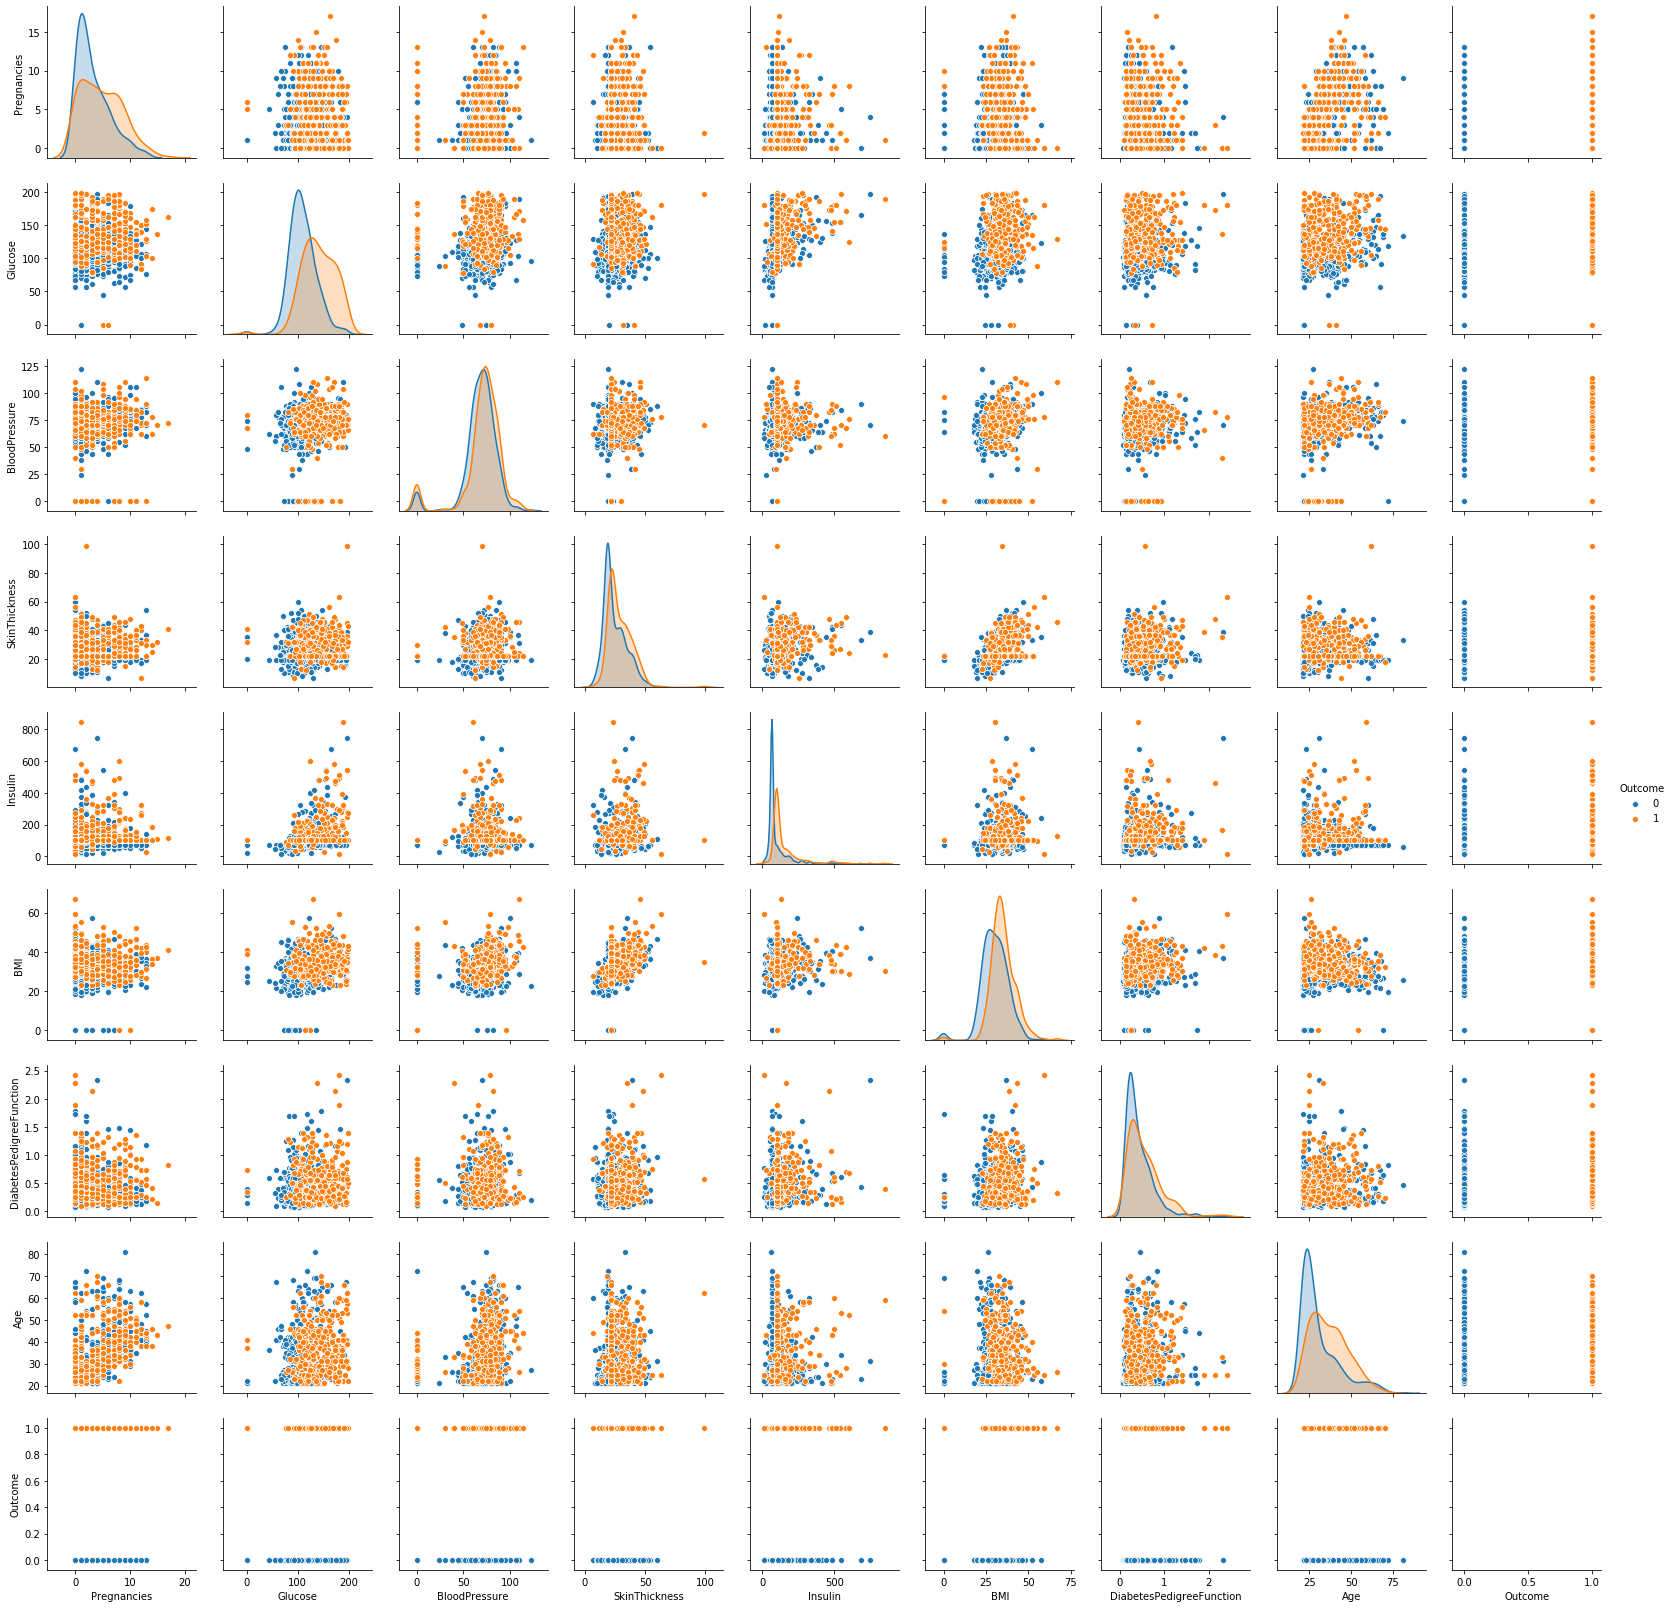

In [15]:
sns.pairplot(data=data,hue="Outcome")

In [16]:
corr_matrix=data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.015304,-0.003258,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.162184,0.423109,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.181240,0.075271,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.015304,0.162184,0.181240,1.000000,0.255293,0.514121,0.158611,0.025308,0.217639
Insulin,-0.003258,0.423109,0.075271,0.255293,1.000000,0.216141,0.168702,0.050598,0.259293
BMI,0.017683,0.221071,0.281805,0.514121,0.216141,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.158611,0.168702,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.025308,0.050598,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.217639,0.259293,0.292695,0.173844,0.238356,1.000000


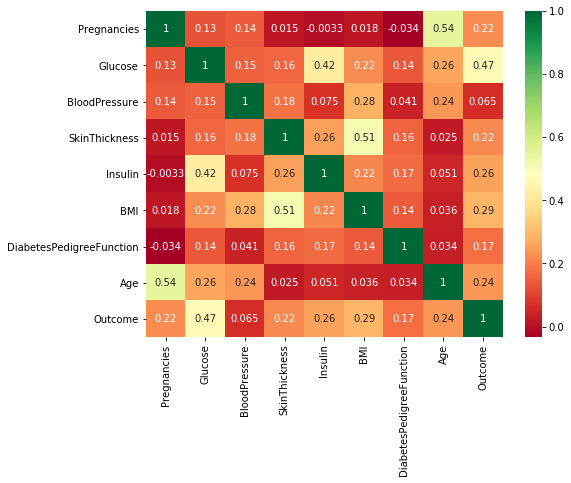

In [17]:
import seaborn as sns
#get correlations of each features in dataset
corr_matrix = data.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(8,6))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Build model 

In [18]:
X=np.array(data[["Pregnancies","BloodPressure","Glucose","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]])
y=np.array(data.Outcome)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


# Voting Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
tree_clf = DecisionTreeClassifier()
knn_clf= KNeighborsClassifier()
bgc_clf=BaggingClassifier()
gbc_clf=GradientBoostingClassifier()
abc_clf= AdaBoostClassifier()

voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('tree', tree_clf),('knn', knn_clf),('bg', bgc_clf),
            ('gbc', gbc_clf),('abc', abc_clf)],voting='hard')
voting_clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
for clf in  (log_clf, rnd_clf, svm_clf,tree_clf,knn_clf,bgc_clf,gbc_clf,abc_clf,voting_clf):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ense

LogisticRegression 0.7987012987012987
RandomForestClassifier 0.8831168831168831
SVC 0.6948051948051948
DecisionTreeClassifier 0.8701298701298701
KNeighborsClassifier 0.8831168831168831
BaggingClassifier 0.8831168831168831
GradientBoostingClassifier 0.922077922077922
AdaBoostClassifier 0.8961038961038961


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.9090909090909091


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=0)
gbc.fit(x_train,y_train)
#predict x_test values
pred=gbc.predict(x_test)
#print accuracy for algorithm
print("Accuracy for GradientBoosting data: ",gbc.score(x_test,y_test))
# 0.8779888739049218

Accuracy for GradientBoosting data:  0.922077922077922


# Model Evaluation Metrics

In [21]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.86      0.89      0.88        47

    accuracy                           0.92       154
   macro avg       0.90      0.91      0.91       154
weighted avg       0.92      0.92      0.92       154



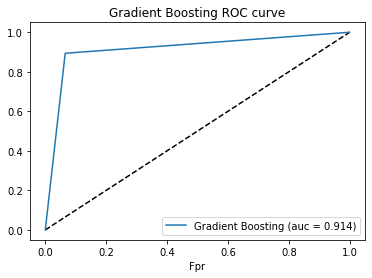

In [22]:
from sklearn.metrics import roc_curve,auc
y_pred_proba = gbc.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,pred)
auc_gbc = auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Gradient Boosting (auc = %0.3f)'% auc_gbc )
plt.xlabel('Tpr')
plt.xlabel('Fpr')
plt.title('Gradient Boosting ROC curve')
plt.legend()
plt.show()

# If need learn  more about Removing outliers 
Check this kemel:https://www.kaggle.com/akhileshdkapse/starter-guide-eda-acc-87-precision-92/notebook#Removing-outliers-!